<a href="https://colab.research.google.com/github/Vaishnviii2904/Plant_Disease_Detection/blob/main/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [38]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
import zipfile
with zipfile.ZipFile('new-plant-diseases-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('plant_disease_dataset')

In [40]:
!unzip new-plant-diseases-dataset.zip -d dataset
!ls dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533_180deg.JPG  
  inflating: dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533_90deg.JPG  
  inflating: d

In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Traing Image Preprocessing**

In [56]:
### Training image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


**Validation Image** **Preprocessing**


In [57]:
###Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [58]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [59]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[ 87.25  77.25  76.25]
   [ 71.5   61.5   60.5 ]
   [ 78.75  68.75  67.75]
   ...
   [156.   145.   143.  ]
   [167.5  156.5  154.5 ]
   [165.25 154.25 152.25]]

  [[ 68.5   58.5   57.5 ]
   [ 74.25  64.25  63.25]
   [ 77.25  67.25  66.25]
   ...
   [157.75 146.75 144.75]
   [154.25 143.25 141.25]
   [167.25 156.25 154.25]]

  [[ 73.    63.    62.  ]
   [ 78.    68.    67.  ]
   [ 81.75  71.75  70.75]
   ...
   [157.25 146.25 144.25]
   [169.   158.   156.  ]
   [155.25 144.25 142.25]]

  ...

  [[205.75 203.75 206.75]
   [205.5  203.5  206.5 ]
   [204.   202.   205.  ]
   ...
   [191.   186.   183.  ]
   [197.5  192.5  189.5 ]
   [191.   186.   183.  ]]

  [[205.   203.   206.  ]
   [209.75 207.75 210.75]
   [207.25 205.25 208.25]
   ...
   [194.75 189.75 186.75]
   [191.5  186.5  183.5 ]
   [196.   191.   188.  ]]

  [[200.   198.   201.  ]
   [203.25 201.25 204.25]
   [203.5  201.5  204.5 ]
   ...
   [195.75 190.75 187.75]
   [200.   195.   192.  ]
   [197.25 192.25 18

**Building Model**

In [60]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [61]:
model = Sequential()

In [62]:
#Building Convolutiion Layer

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=38,activation='softmax')) #output layer

In [63]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [65]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 162s 67ms/step - accuracy: 0.3853 - loss: 2.1839 - val_accuracy: 0.8273 - val_loss: 0.5596
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 130s 59ms/step - accuracy: 0.8254 - loss: 0.5515 - val_accuracy: 0.9064 - val_loss: 0.2896
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 153s 64ms/step - accuracy: 0.9038 - loss: 0.3016 - val_accuracy: 0.9098 - val_loss: 0.3149
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9325 - loss: 0.2091 - val_accuracy: 0.9308 - val_loss: 0.2195
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 59ms/step - accuracy: 0.9506 - loss: 0.1528 - val_accuracy: 0.9548 - val_loss: 0.1420
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 152s 63ms/step - accuracy: 0.9606 - loss: 0.1178 - val_accuracy: 0.9554 - val_loss: 0.1429
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 59ms/step - accuracy: 0.9676 - loss: 0.0983 - val_accuracy: 0.9448 - val_loss: 0.1877
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 58ms/step - accuracy: 

In [ ]:
#Problem of overshooting loss function
# reason- high learning rate- choose small learning rate
# There may be a chance of underfitting- increase number of neuron
# To avoid underfitting add more conv2dlayer to extract more features



**Model Evaluation**

In [66]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.9911 - loss: 0.0264


In [67]:
print(train_loss,train_acc)

0.022410046309232712 0.9923607707023621


In [68]:
val_loss,val_accuracy=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9697 - loss: 0.1042


In [69]:
print(val_loss,val_accuracy)

0.11046358942985535 0.9681311249732971


In [70]:
#saving model
model.save('plant_disease_model.h5')

In [71]:
model.save('plant_disease_model.keras')

In [72]:
training_history.history

{'accuracy': [0.5859165191650391,
  0.8520662784576416,
  0.9135642647743225,
  0.9383028745651245,
  0.9541361331939697,
  0.9637385010719299,
  0.9693719148635864,
  0.97472083568573,
  0.9784052968025208,
  0.9805249571800232],
 'loss': [1.4085935354232788,
  0.46369296312332153,
  0.2720056474208832,
  0.1884101927280426,
  0.139164537191391,
  0.10882972180843353,
  0.09266505390405655,
  0.07545127719640732,
  0.06692740321159363,
  0.058949343860149384],
 'val_accuracy': [0.8273389339447021,
  0.9064420461654663,
  0.9097996950149536,
  0.9307990074157715,
  0.954757571220398,
  0.9554404616355896,
  0.9447985291481018,
  0.9490097761154175,
  0.9727976322174072,
  0.9681311249732971],
 'val_loss': [0.5596072673797607,
  0.2896410822868347,
  0.3149147629737854,
  0.21947689354419708,
  0.14198364317417145,
  0.14290156960487366,
  0.1877417117357254,
  0.18790097534656525,
  0.09379172325134277,
  0.11046358942985535]}

In [73]:
#Recording History in JSON
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history,f)


**Accuracy Visualisation**

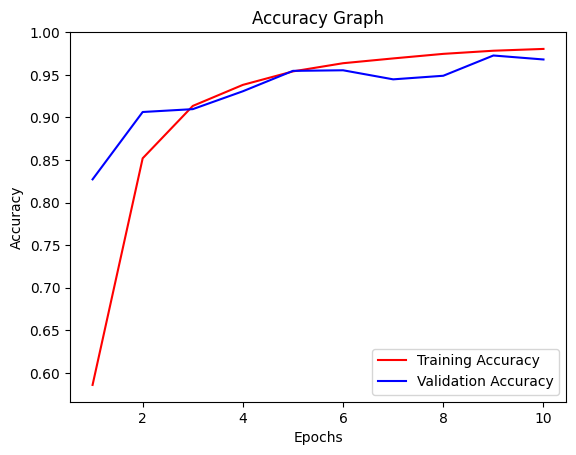

In [74]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy',color='red')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy',color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

In [75]:
#Some other metrics for evaluation
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [77]:
test_set =tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [78]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step


(array([[1.0000000e+00, 1.8207910e-09, 4.1188056e-12, ..., 1.0319824e-17,
         1.4550636e-15, 1.2184127e-13],
        [1.0000000e+00, 6.5589836e-09, 1.7054489e-12, ..., 7.5726931e-20,
         1.2141012e-15, 7.6376580e-18],
        [1.0000000e+00, 2.8148094e-12, 6.1604042e-14, ..., 5.2118009e-21,
         4.1023907e-18, 4.4653729e-16],
        ...,
        [4.1826578e-14, 4.9727443e-18, 1.8134847e-13, ..., 3.5638441e-15,
         3.6281369e-15, 1.0000000e+00],
        [3.6578063e-15, 5.2179707e-20, 2.8217287e-15, ..., 7.0363047e-17,
         1.0027078e-16, 1.0000000e+00],
        [7.3022149e-16, 1.5461369e-17, 3.4767068e-16, ..., 2.5778976e-18,
         8.9066836e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [79]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [80]:
true_categories=tf.concat([tf.argmax(y, axis=-1) for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
classification_report=classification_report(true_categories,predicted_categories,target_names=class_name)
print(classification_report)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.99      0.94      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.83      0.90       410
                       Corn_(maize)___Common_rust_       0.95      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.99      0.

In [83]:
cn=confusion_matrix(true_categories,predicted_categories)
cn

array([[487,   6,   0, ...,   0,   0,   0],
       [  0, 493,   0, ...,   0,   0,   0],
       [  0,   0, 427, ...,   0,   0,   3],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 480]])

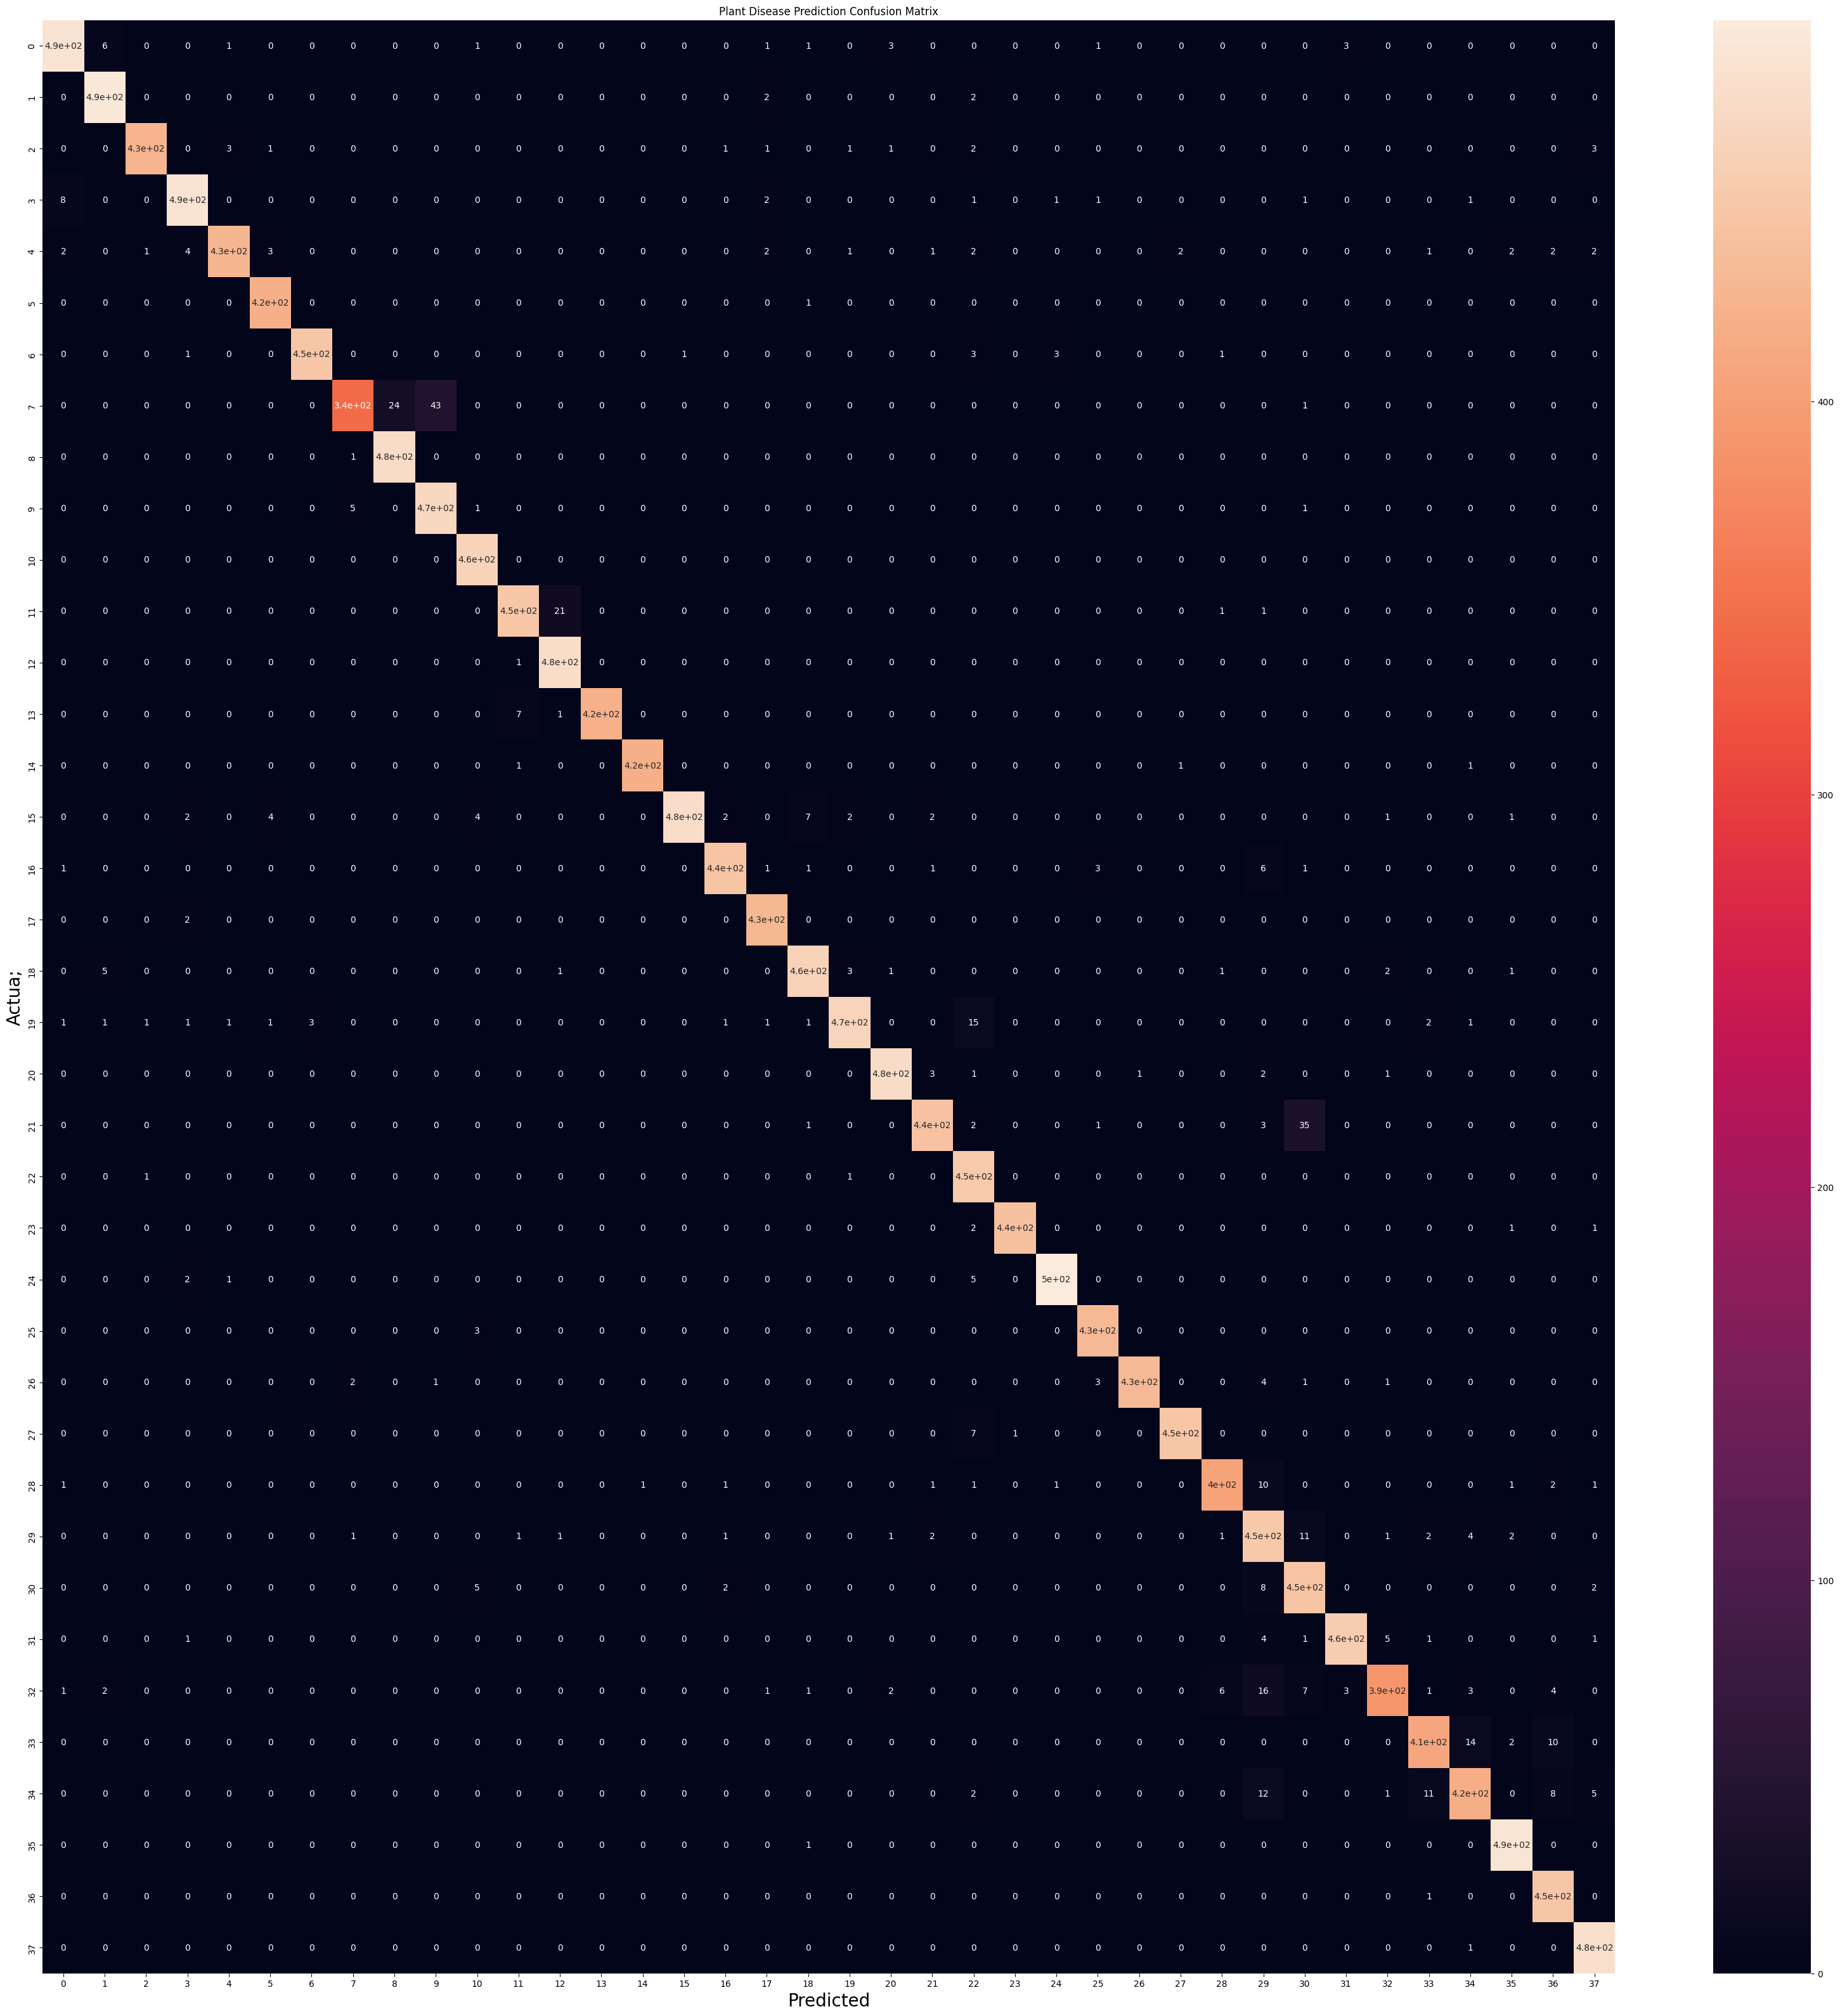

In [84]:
#confusion matrix visualisation
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True,annot_kws={'size':10})
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actua;',fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix')
plt.show()

***TESTING MODEL***

In [85]:
model=tf.keras.models.load_model('/content/plant_disease_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [86]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,685,526 (59.84 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,842,764 (29.92 MB)

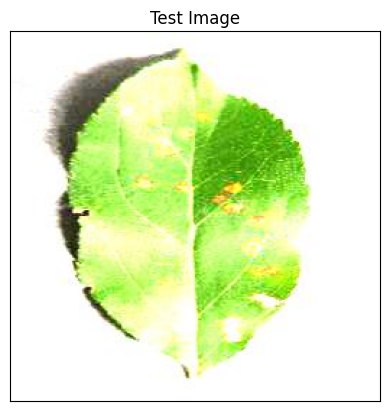

In [87]:
#Visualizing single image of test
import cv2
image_path="/content/test/test/AppleCedarRust1.JPG"

#Reading Image
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [88]:
#Testing Model
#Step1: Convert Image to Array
import numpy as np

img=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_array=tf.keras.preprocessing.image.img_to_array(img)
input_array=np.array([input_array/255]) #Converting Single Image to batch

print(input_array.shape)

(1, 128, 128, 3)


In [89]:
prediction=model.predict(input_array)
print(prediction,prediction.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.02881638 0.01251317 0.029313   0.03461843 0.0141924  0.05839643
  0.01196054 0.07019898 0.02067115 0.05992464 0.06101224 0.01805409
  0.0172627  0.01282212 0.01065524 0.02905236 0.03629428 0.01272936
  0.01450181 0.01551567 0.01601047 0.02750305 0.01976623 0.01133121
  0.01381345 0.05512729 0.01939563 0.00929832 0.03202459 0.04348574
  0.0631986  0.01852513 0.01474805 0.01587942 0.01509479 0.02258412
  0.01096034 0.02274861]] (1, 38)


In [90]:
result_index = np.argmax(prediction)
print(result_index)

7


In [91]:
class_name=test_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

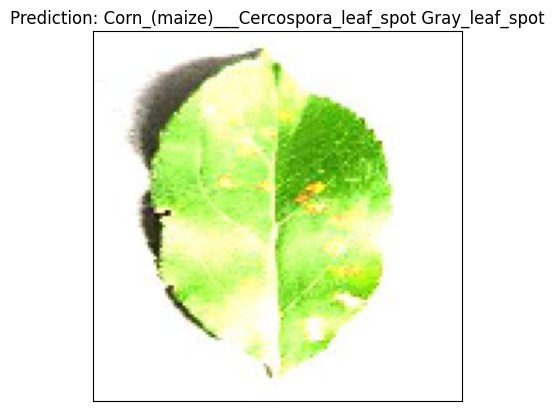

In [92]:
#Displaying result of disease prediction
model_prediction=class_name[result_index]
plt.imshow(img)
plt.title(f'Prediction: {model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()
